### Problem Statement

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of restaurants.

**In this dataset predict 2 things –**
1) Average Cost for two
2) Price range


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [326]:
zomato_data = pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Dataset for practice\\zomato_data\\zomato.csv',encoding='latin1')

In [327]:
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [328]:
zomato_data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [329]:
zomato_data.shape

(9551, 21)

**In Zomato dataset numerical as well as categorical values contain with 9551 rows and 21 columns.**

In [330]:
country_code = pd.read_excel('E:/Yaminee/Data Trained/Yaminee Tiwari/Project/Dataset for practice/zomato_data/Country_Code.xlsx')

In [331]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [332]:
country_code.shape

(15, 2)

**In country code dataset numerical as well as categorical values contain with 15 rows and 2 columns.**

Now we will join two dataset by using merge method

In [333]:
df=pd.merge(zomato_data,country_code,on='Country Code',how='inner')

In [334]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [335]:
df.shape

(9551, 22)

Now dataset contain 9551 rows and 22 columns 

#### Performing Data Expolaroty Analysis 

In [336]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

**The dataset contains both numerical and categorical values, with 9551 rows and 22 columns. Among these, 20 are independent variables, and 2 are target variables. In this project, we will use regression techniques**

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**From above infomation we can observed that**
- The dataset's index values range from 0 to 9550, covering 9551 rows.
- It includes columns with three distinct data types: Float, Object, and Int.
- Specifically, there are missing values within the 'Cuisines' column.

In [338]:
#showing sum of duplicated values 
df.duplicated().sum()

0

No duplicate value present

### Checking Nan,Null and other values

In [339]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

9 null values present in 'Cuisines' column

In [340]:
#showing number of uniques values
for unique in df.columns:
   print(unique,'=>',df[unique].nunique())

Restaurant ID => 9551
Restaurant Name => 7446
Country Code => 15
City => 141
Address => 8918
Locality => 1208
Locality Verbose => 1265
Longitude => 8120
Latitude => 8677
Cuisines => 1825
Average Cost for two => 140
Currency => 12
Has Table booking => 2
Has Online delivery => 2
Is delivering now => 2
Switch to order menu => 1
Price range => 4
Aggregate rating => 33
Rating color => 6
Rating text => 6
Votes => 1012
Country => 15


In [341]:
#showing number of uniques values
for unique in df.columns:
   print(unique,'=>',df[unique].unique(),'\n')

Restaurant ID => [6317637 6304287 6300002 ... 5915807 5916112 5927402] 

Restaurant Name => ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"] 

Country Code => [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208] 

City => ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Athens' 'Augusta' 'Boise'
 'Cedar Rapids/Iowa City' 'Clatskanie' 'Cochrane' 'Columbus' 'Dalton'
 'Davenport' 'Des Moines' 'Dubuque' 'Fernley' 'Gainesville' 'Lakeview'
 'Lincoln' 'Macon' 'Mc Millan' 'Miller' 'Monroe' 'Ojo Caliente' 'Orlando'
 'Pensacola' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah'
 'Sioux City' 'Tampa Bay' 'Valdosta' 'Vernonia' 'Waterloo' 'Weirton'
 'Winchester Bay' 'Armidale' 'Balingup' 'Beechworth' 'Dicky Beach'
 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs'

In [342]:
for i in df.columns:
    counts = df[i].value_counts()
    print(f"Counts for column '{i}':\n{counts}\n")

Counts for column 'Restaurant ID':
Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64

Counts for column 'Restaurant Name':
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

Counts for column 'Country Code':
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

Counts for column 'City':
City
New Delhi       5473
Gurgaon        

### Handling Null values 

In [343]:
df['Cuisines']=df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [345]:
df.drop(['Restaurant ID','Country Code','Switch to order menu'],axis=1,inplace=True)

We drop this columns because this column contain unique values

**Completed Exploratory Data Analysis (EDA), we are now proceeding to the data visualization phase**

### Data Visualization

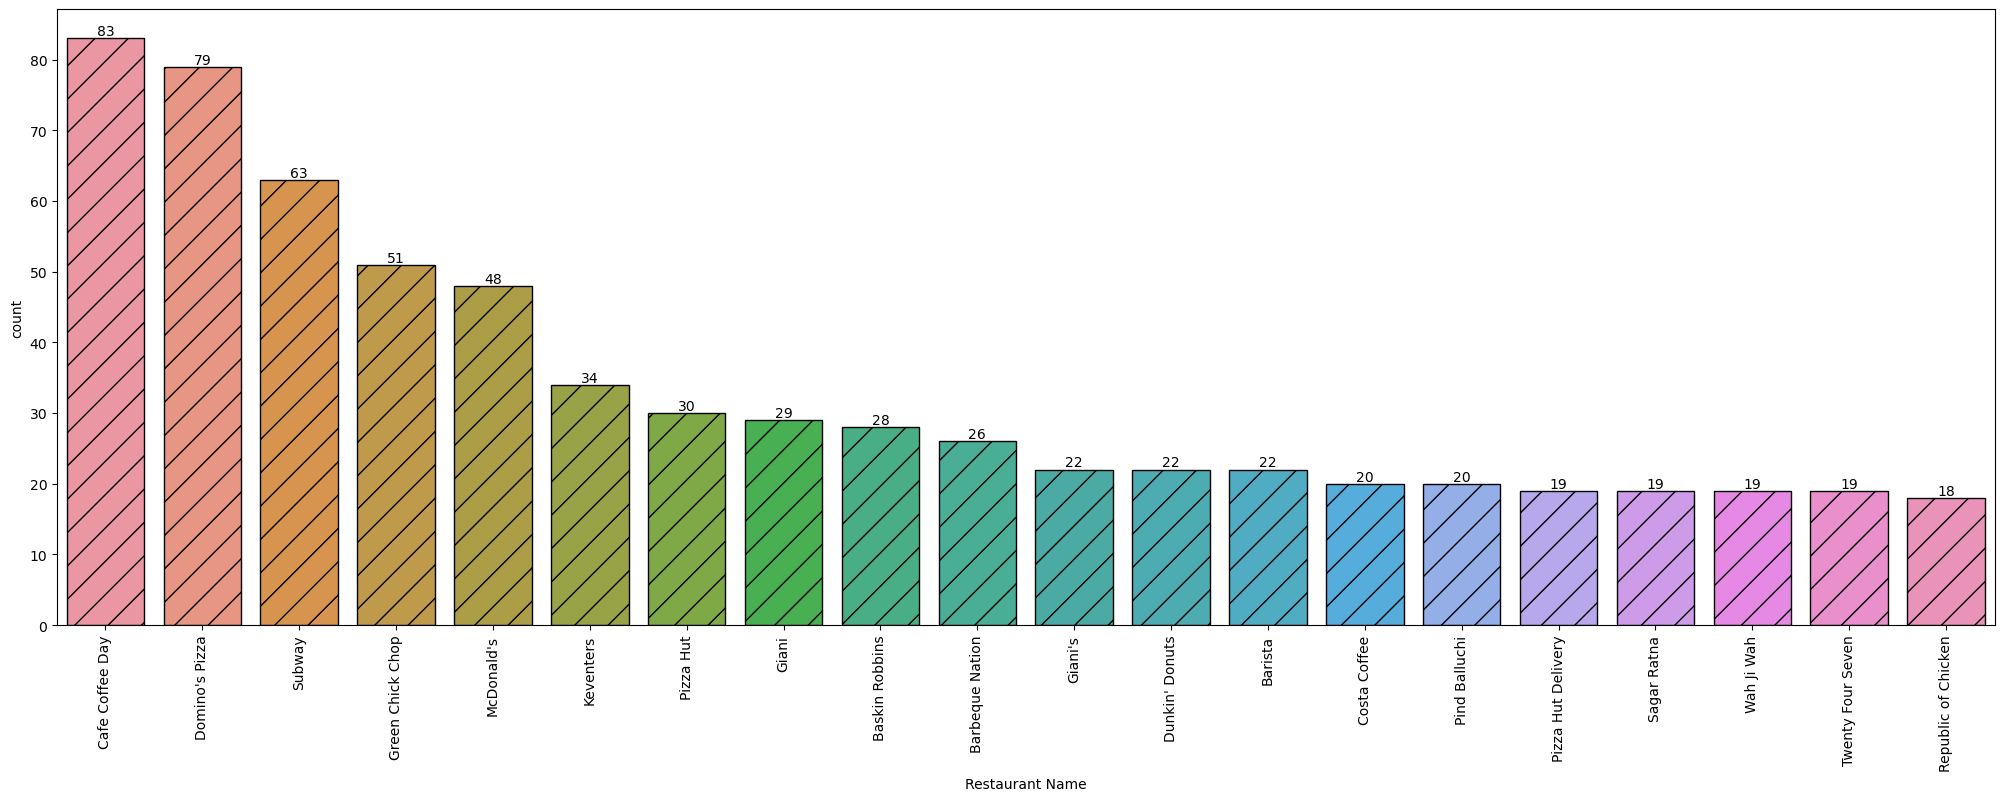

In [214]:
# Get the top 20 most restaurant name
top_restaurant = df['Restaurant Name'].value_counts().head(20).index.tolist()

# Filter the data to include only the top 20 restaurant
data_top_20 = df[df['Restaurant Name'].isin(top_restaurant)]

# Plotting
plt.figure(figsize=(25,8))
ax = sns.countplot(x='Restaurant Name', data=data_top_20, order=top_restaurant)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
plt.show()

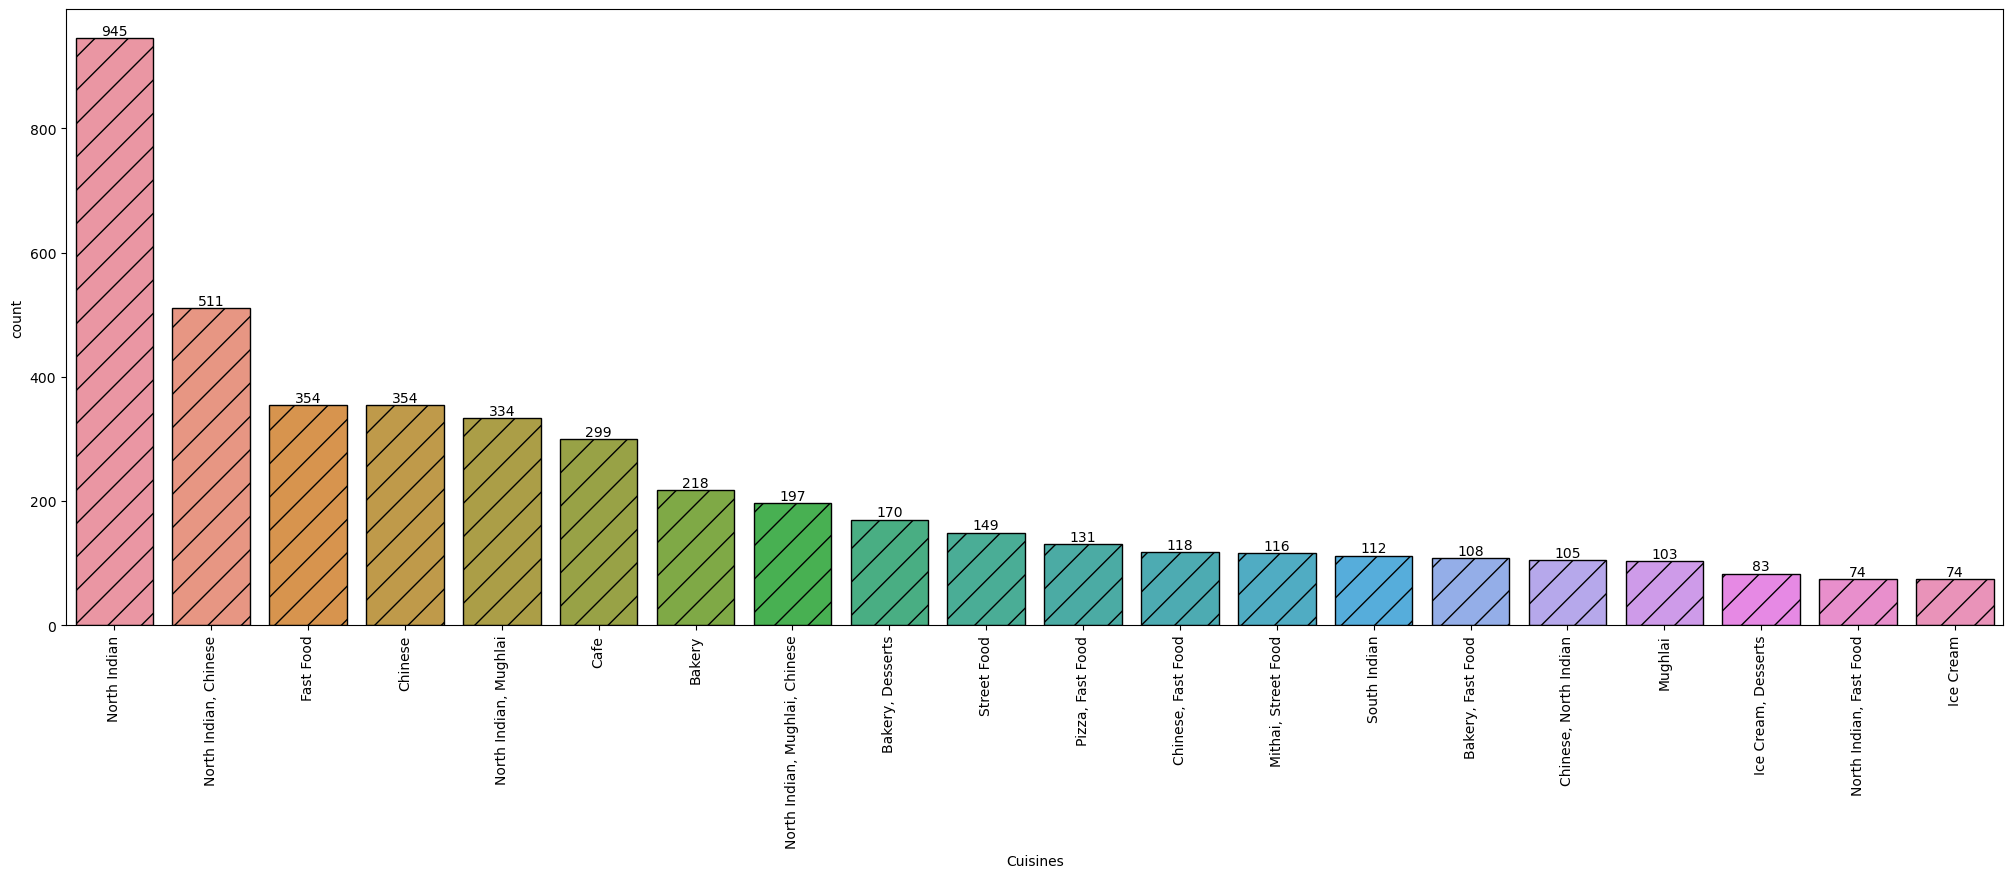

In [215]:
# Get the top 20 most Cuisines
top_Cuisines = df['Cuisines'].value_counts().head(20).index.tolist()

# Filter the data to include only the top 20 Cuisines
data_top_20 = df[df['Cuisines'].isin(top_Cuisines)]

# Plotting
plt.figure(figsize=(25,8))
ax = sns.countplot(x='Cuisines', data=data_top_20, order=top_Cuisines)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
plt.show()

**From above top 20 Cuisine graph we can observe that North Indian cuisine enjoys greater popularity and recognition.**

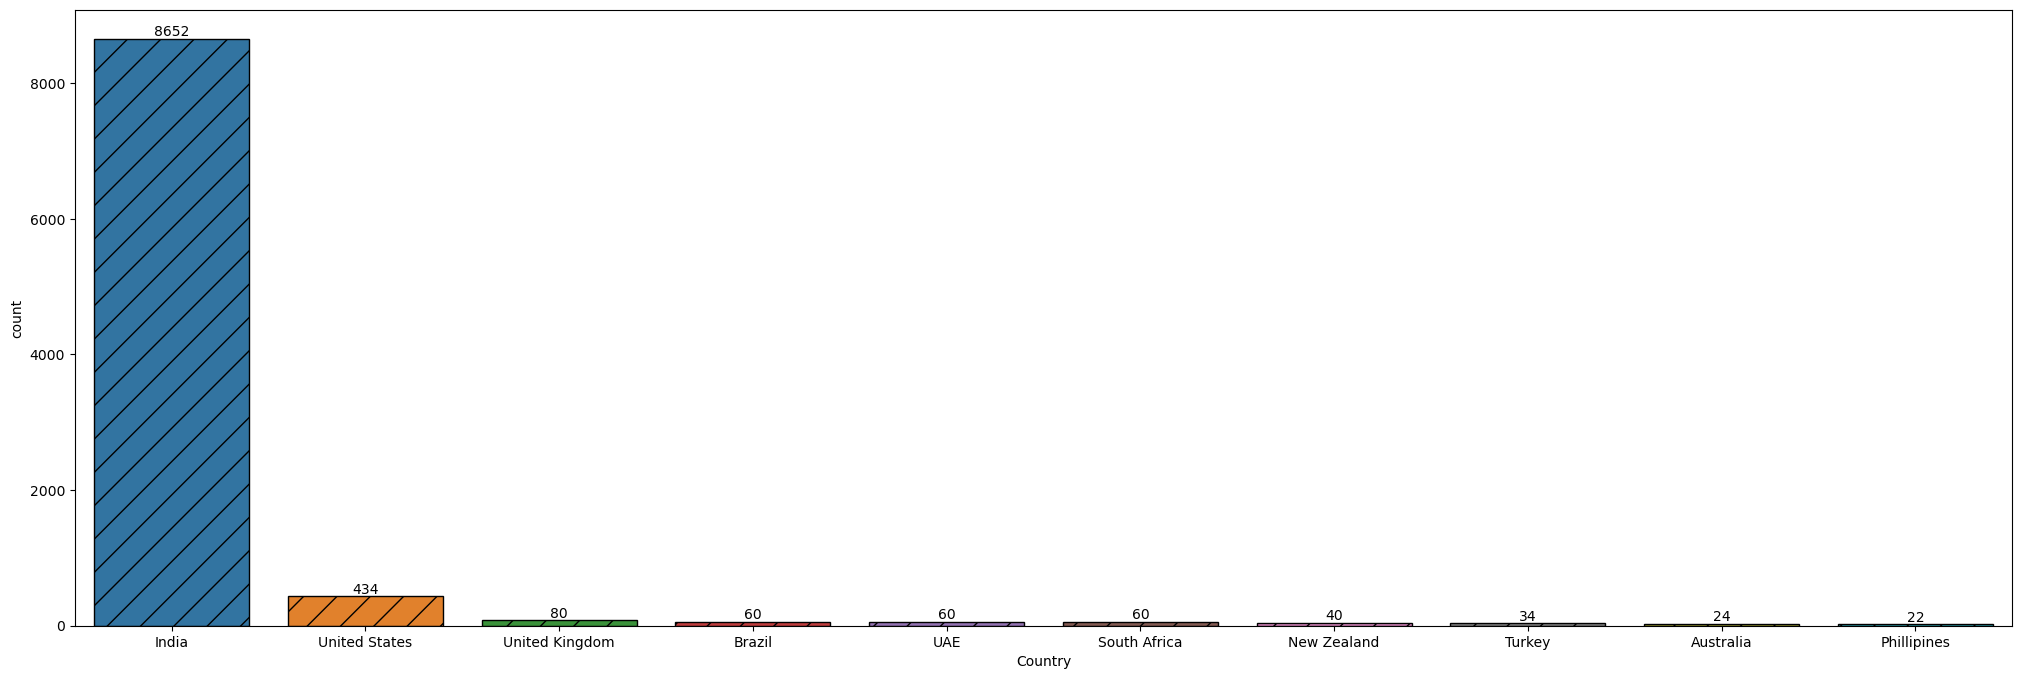

In [216]:
# Get the top 10 most Country
top_Country = df['Country'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 Country
data_top_10 = df[df['Country'].isin(top_Country)]

# Plotting
plt.figure(figsize=(25,8))
ax = sns.countplot(x='Country', data=data_top_10, order=top_Country)
for bars in ax.containers:
    ax.bar_label(bars)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
plt.show()

**From above graph we can observe from the graph that the majority of orders originate from India**

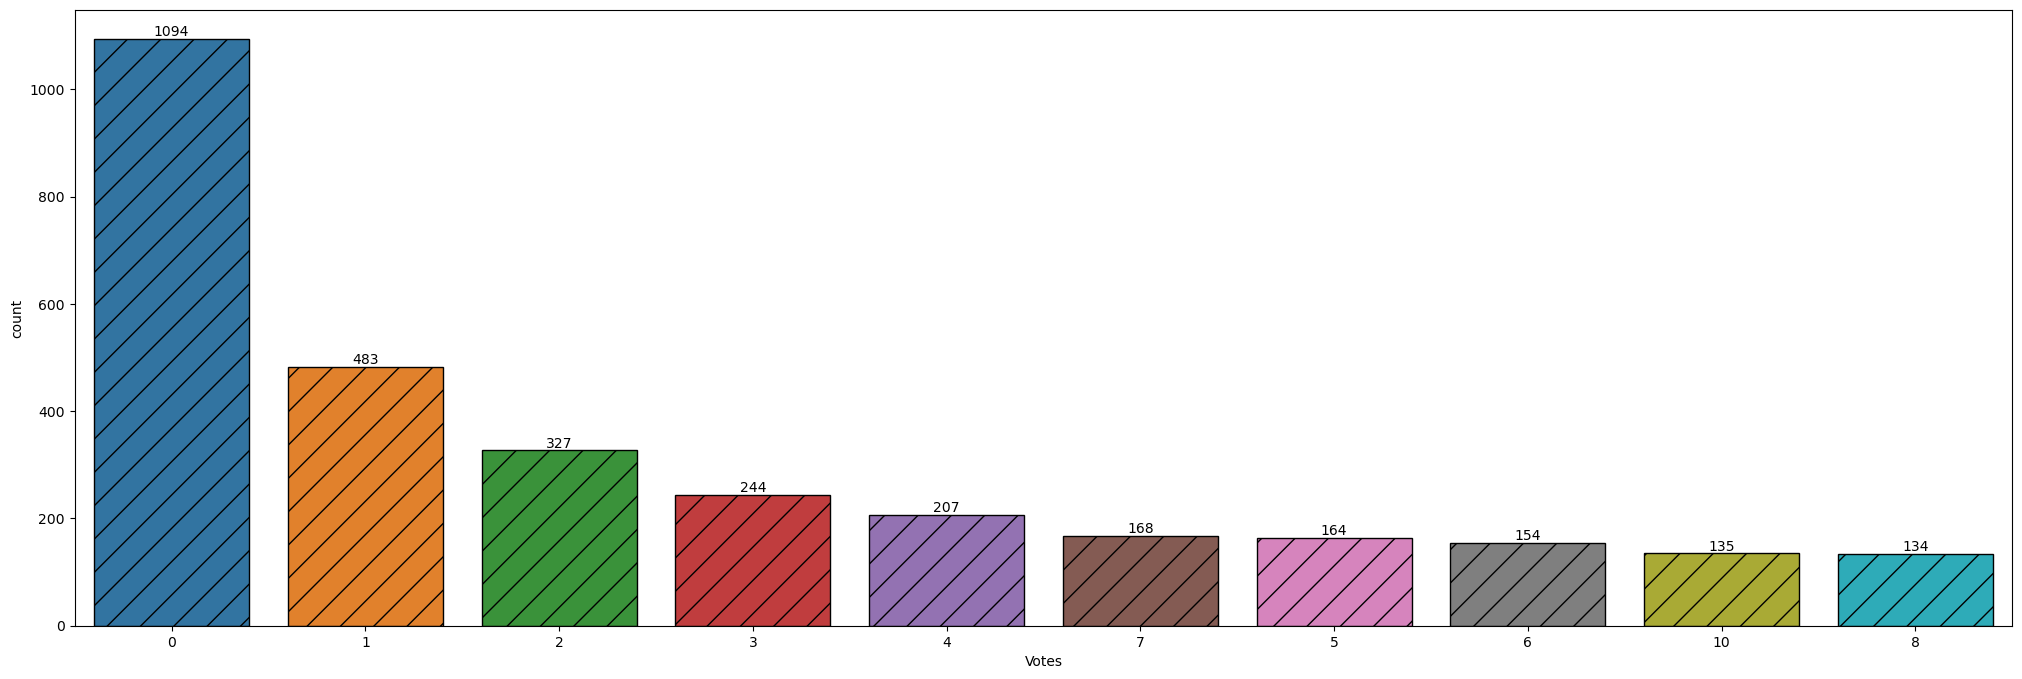

In [217]:
# Get the top 10 most votes
top_Votes = df['Votes'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 votes
data_top_10 = df[df['Votes'].isin(top_Votes)]

# Plotting
plt.figure(figsize=(25,8))
ax = sns.countplot(x='Votes', data=data_top_10, order=top_Votes)
for bars in ax.containers:
    ax.bar_label(bars)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
plt.show()

**From the above Top 10 votes graph we can observe that:**

- The maximum votes belong to category 0, with a count of 1094. This indicates that the majority of restaurants did not receive any votes from customers.
- The second highest vote count, which belongs to category 1, though less than half of the highest, still shows a strong preference compared to the other categories.

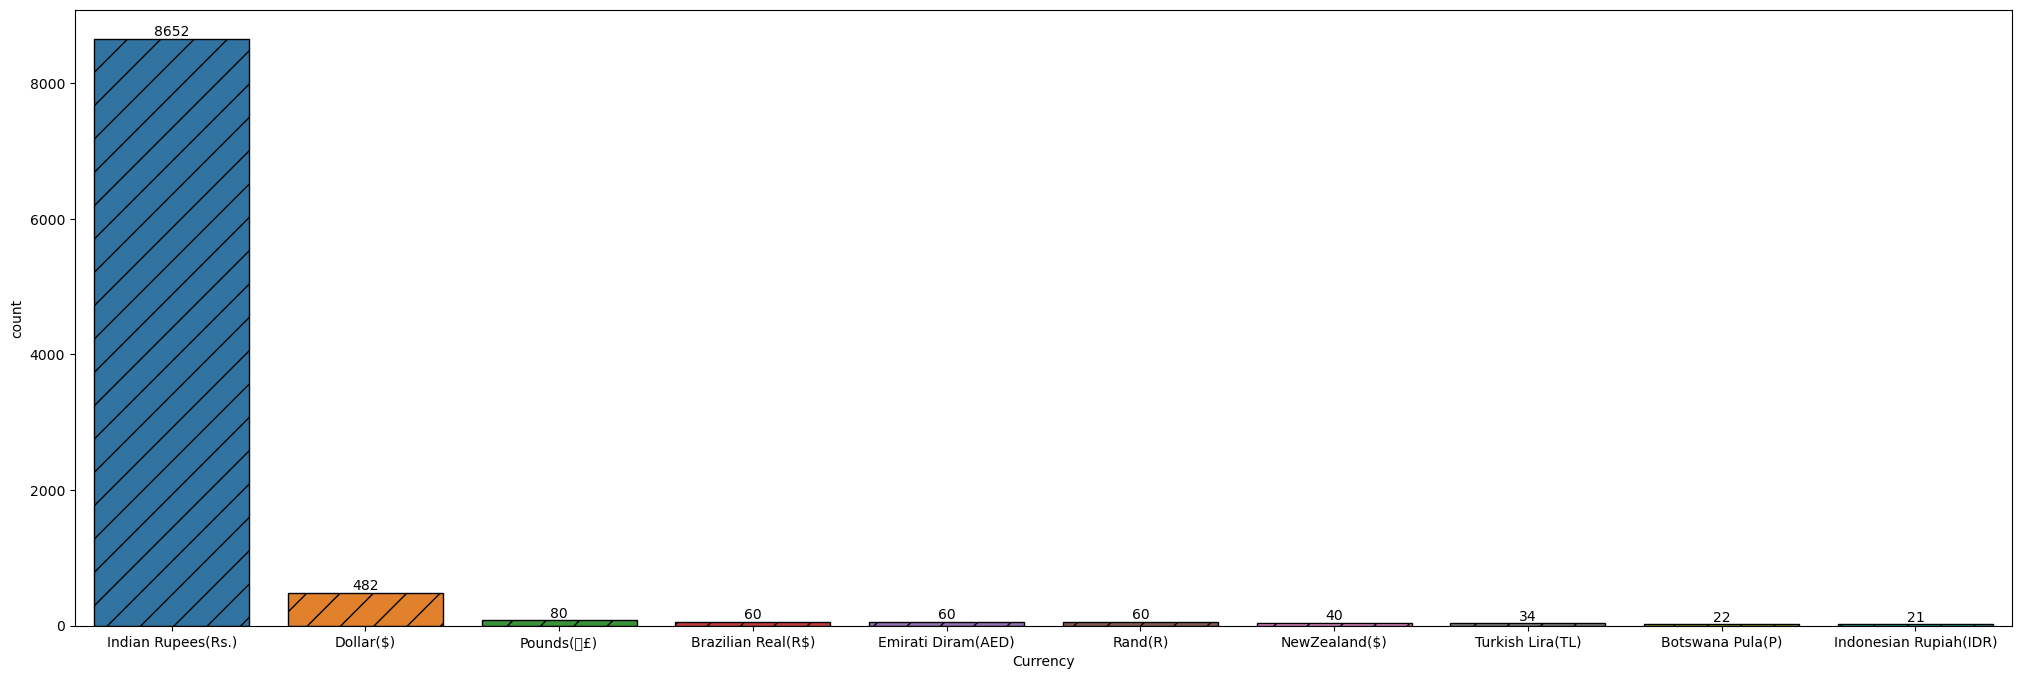

In [218]:
# Get the top 10 most Cuisines
top_Currency = df['Currency'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 Cuisines
data_top_10 = df[df['Currency'].isin(top_Currency)]

# Plotting
plt.figure(figsize=(25,8))
ax = sns.countplot(x='Currency', data=data_top_10, order=top_Currency)
for bars in ax.containers:
    ax.bar_label(bars)
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
plt.show()

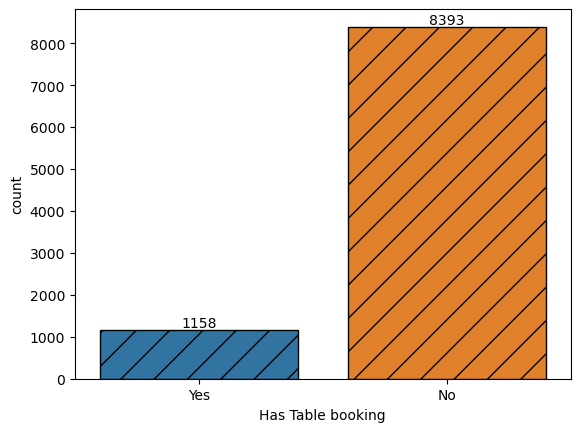

In [219]:
ax = sns.countplot(x='Has Table booking', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color      

**From above graph we can observe that maximum restaurant did not accept advance table booking.**

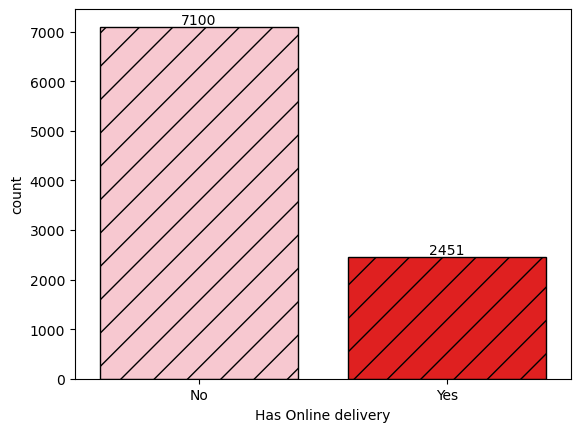

In [220]:
custom_palette = ['pink','red']
ax = sns.countplot(x='Has Online delivery', data=df,palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color    

**From above graph we can observe that maximum restaurant did not accept online delivery.**

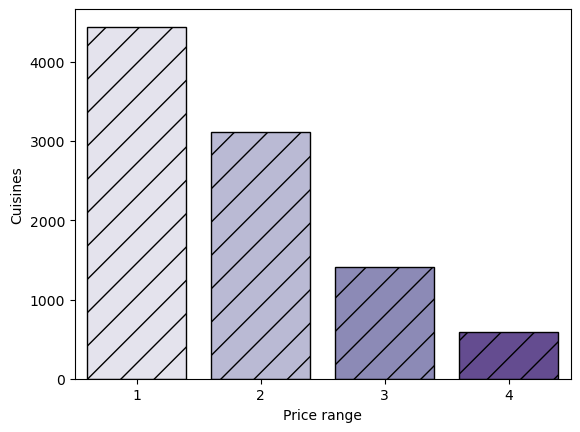

In [221]:
cuisines = df.groupby("Price range")["Cuisines"].count().reset_index()
ax=sns.barplot(data = cuisines, x = "Price range", y = "Cuisines", palette = "Purples")
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
plt.show()

**The graph above indicates that price range 1 has the highest count of cuisines.**

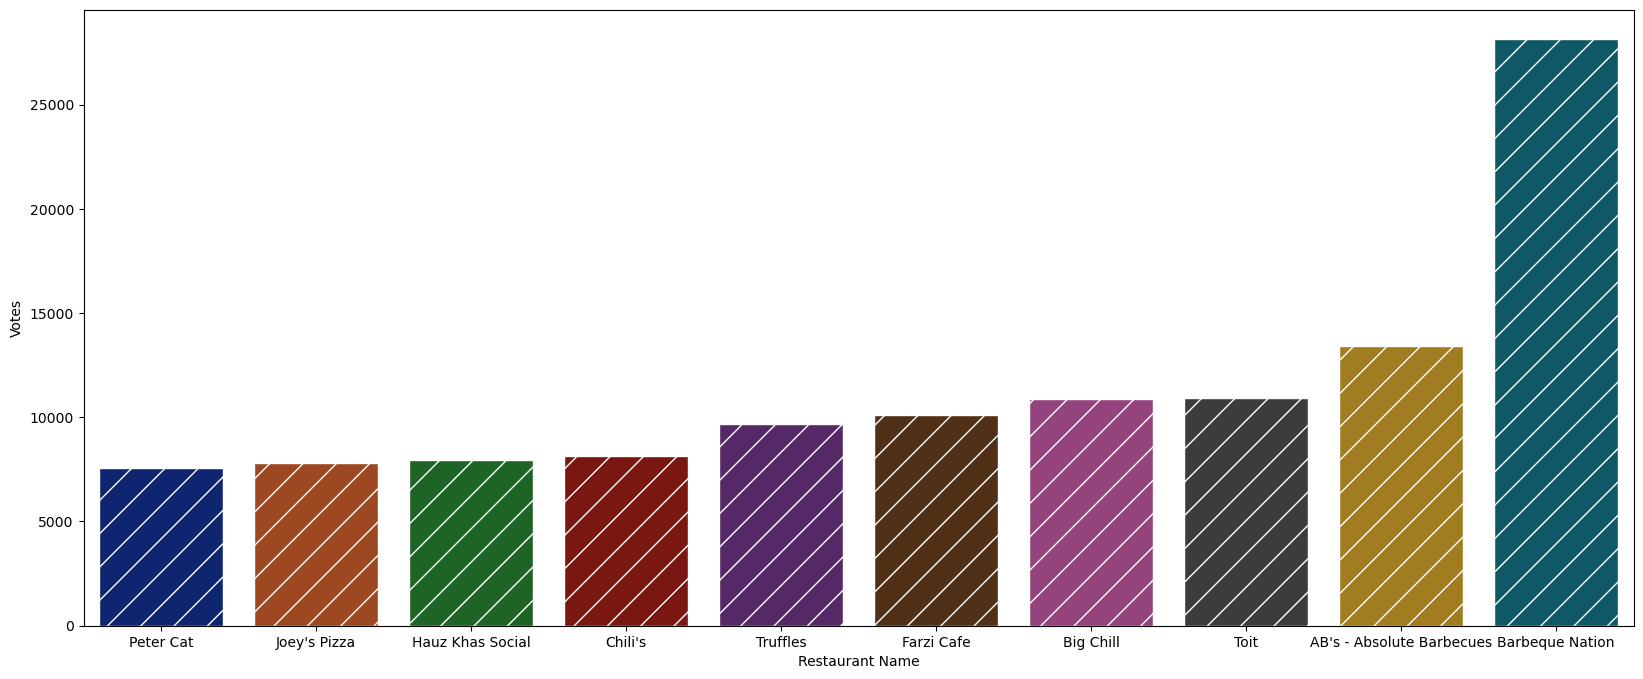

In [222]:
plt.figure(figsize=(20,8))
vote = df.groupby("Restaurant Name")["Votes"].sum().reset_index()
vote = vote.sort_values(by = "Votes")
vote = vote.tail(10)
ax=sns.barplot(data =vote, x = "Restaurant Name", y = "Votes", palette = "dark")
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('white')  # New edge color
plt.show()

**From the graph above, we can see that Barbeque Nation is the top restaurant by votes.**

### Checking Distribution of data

In [223]:
categorical_columns=df.loc[:,df.dtypes!='object']

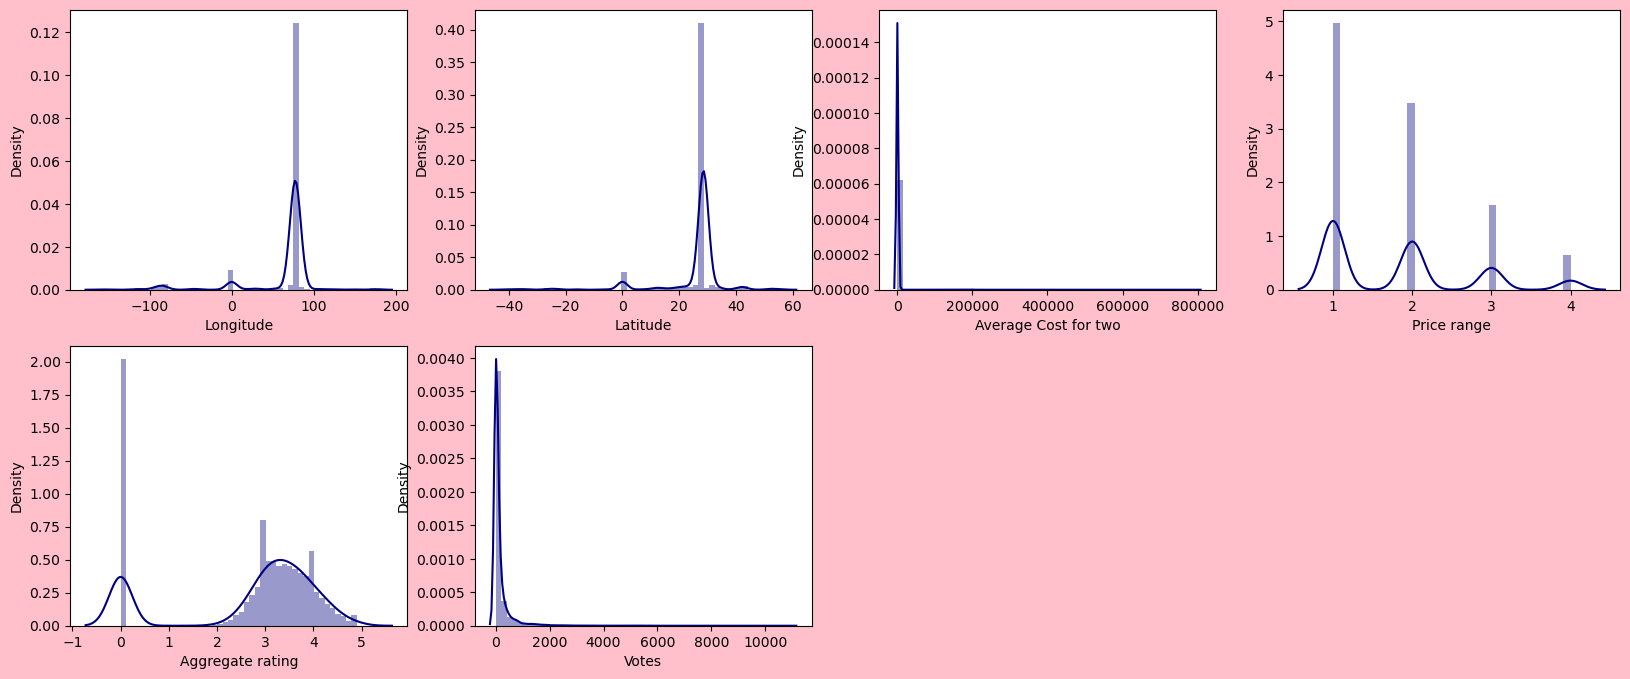

In [224]:
plt.figure(figsize=(20,8),facecolor='pink')
count=1
for i in categorical_columns.columns:
    if count<=10:
        ax=plt.subplot(2,4,count)
        sns.distplot(df[i],color='navy')
        plt.xlabel(i)
    count+=1
plt.show()

**From above graph we can observe that**

1. **Restaurant ID**: The distribution is bimodal with two distinct peaks, suggesting that there are two groups of Restaurant IDs that are more common.

2. **Country Code**: The distribution is highly skewed to the left, indicating that a few country codes dominate the data.

3. **Longitude**: The distribution has a sharp peak around the center with a long tail on both sides. Most restaurants are concentrated in a specific longitudinal range.

4. **Latitude**: Similar to longitude, there is a sharp peak with a concentration of restaurants in a specific latitudinal range.

5. **Average Cost for Two**: The distribution is highly right-skewed, indicating that most restaurants have a lower average cost for two, with a few having very high costs.

6. **Price Range**: The distribution shows clear peaks at certain points, indicating that specific price ranges are more common among the restaurants.

7. **Aggregate Rating**: The distribution shows multiple peaks with a significant concentration around a rating of 3 to 4, indicating that many restaurants have moderate ratings.

8. **Votes**: The distribution is highly right-skewed, suggesting that most restaurants have received a low number of votes, while a few have received a very high number of votes.


### Checking Statistical Summary

In [225]:
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Based on the above statistical summary:
- Since the count is the same across all numerical columns, it indicates that there are no missing values in the dataset.
- The mean is greater than the median (50th percentile) for the columns 'Average Cost for two' and 'Votes', indicating that these distributions are right-skewed.
- The mean is less than the median (50th percentile) for the columns 'Longitude','Price range' and 'Aggregate rating', indicating that these distributions are left-skewed.
- The columns Country Code,Longitude,Latitude,Average Cost for two, Aggregate rating and Votes have high stander deviation .
- There is a significant difference between the maximum value and the 75th percentile for these columns, suggesting the presence of outliers.

### Checking Outliers

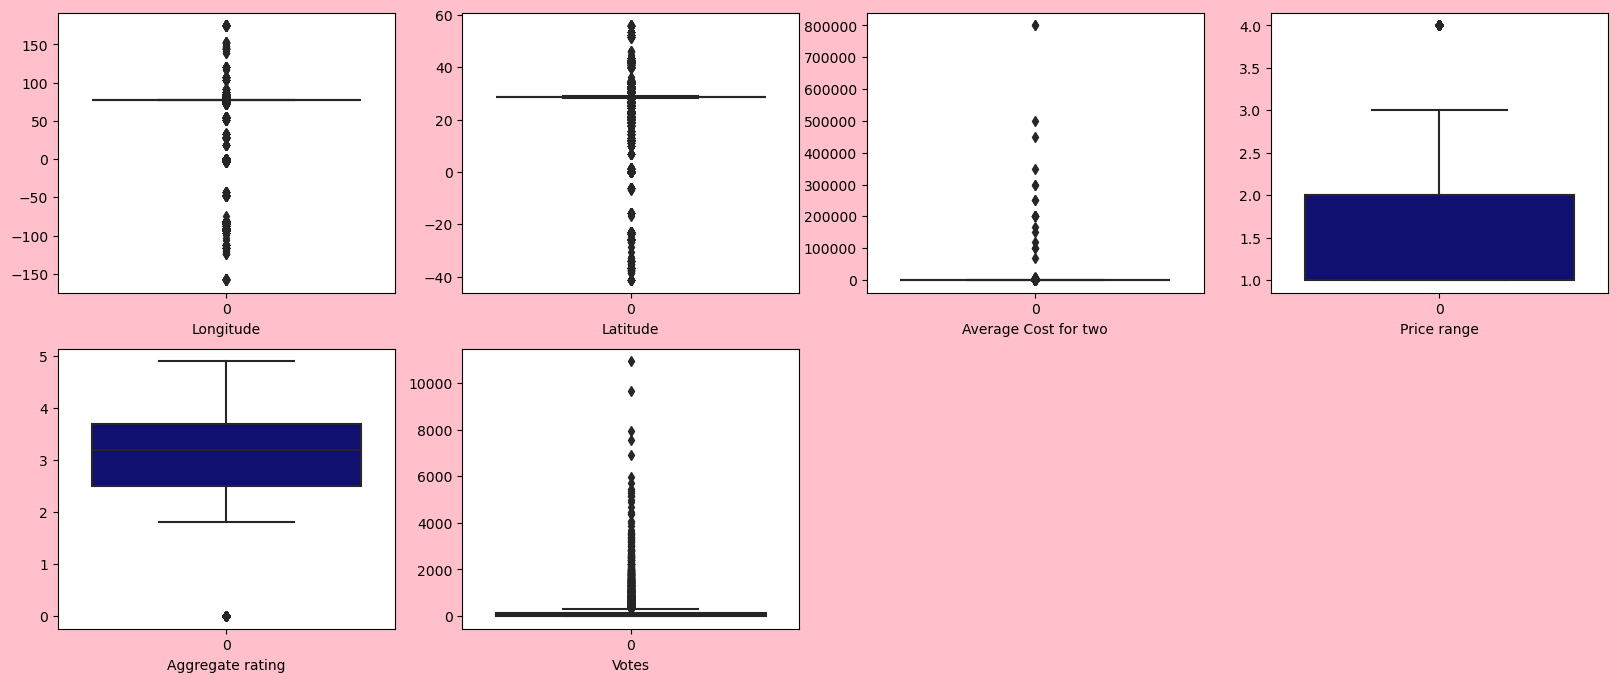

In [226]:
plt.figure(figsize=(20,8),facecolor='pink')
count=1
for i in categorical_columns.columns:
    if count<=10:
        ax=plt.subplot(2,4,count)
        sns.boxplot(df[i],color='navy')
        plt.xlabel(i)
    count+=1
plt.show()

We can observed that the outliers is present in the data set but we will go with the outiers 

### Performing Encoding

In [347]:
column_name=[col for col in df.columns if df[col].dtype=='object' ]
unique_values=[df[col].nunique() for col in column_name]

In [348]:
data_frame=pd.DataFrame({'col_name':column_name,
                        'value':unique_values})

In [349]:
data_frame.sort_values('value', ascending=False)

,col_name,value
2,Address,8918
0,Restaurant Name,7446
5,Cuisines,1825
4,Locality Verbose,1265
3,Locality,1208
1,City,141
12,Country,15
6,Currency,12
10,Rating color,6
11,Rating text,6


In [350]:
df.drop(['Address','Restaurant Name','Locality Verbose','Locality'],axis=1,inplace=True)

In [351]:
#importing Encoder label incoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list=['Cuisines','Currency','City',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text',
 'Country']
for column in list:
    df[column]=labelencoder.fit_transform(df[column])

We performed encoding technique for transforming categorical data into numerical form 

### First, we will go with target variable 'Average Cost for two'.

### Checking Skewness

In [233]:
df.skew()

City                    -1.193777
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

We can see that there is skewness present in both the numerical and categorical data. However, we will focus on removing skewness only from the numerical columns. The skewness is present in the 'Average Cost for Two' and 'Votes' columns. Since 'Average Cost for Two' is our target variable, we will only remove the skewness from the 'Votes' column by applying the square root transformation method

In [234]:
#removing skewness by using cuberoot method
df['Votes']=np.cbrt(df['Votes'])

### Checking correlation between target variable and independent variables

In [235]:
corr_matrix=df.corr()
corr_matrix

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
City,1.000000,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.125856,-0.180959
Longitude,0.117391,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.147268,-0.766221
Latitude,-0.004301,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,0.005973,0.181299
Cuisines,0.026614,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.062206,-0.127955
Average Cost for two,-0.028838,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.083667,-0.004034
Currency,-0.071996,0.337334,-0.101864,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.021033,-0.105296
Has Table booking,-0.003762,0.100488,0.054658,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.280070,-0.062076
Has Online delivery,0.012723,0.178757,0.118722,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.230333,-0.140464
Is delivering now,-0.014039,0.018787,0.015001,0.007773,-0.001862,0.001458,-0.016816,0.101730,1.000000,0.010940,0.019180,0.001886,-0.031970,0.016405,-0.016607
Price range,-0.105759,-0.078939,-0.166688,-0.005350,0.075083,0.075179,0.501925,0.077918,0.010940,1.000000,0.437944,-0.140468,0.164242,0.519227,0.178035


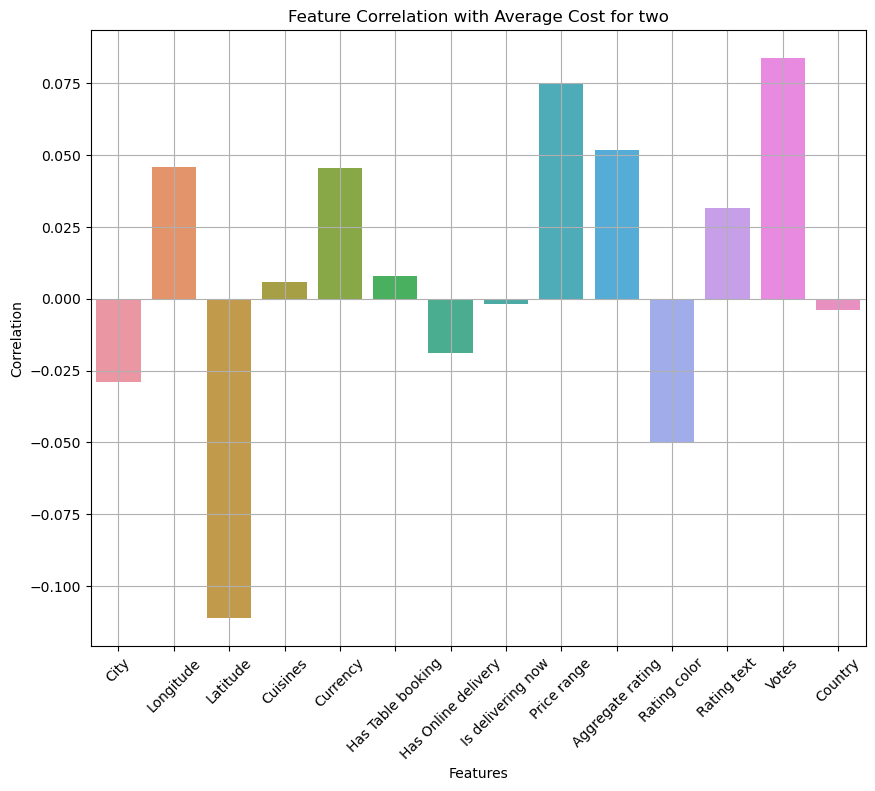

In [236]:
# Plot correlation with target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_matrix['Average Cost for two'].drop('Average Cost for two').index, y=corr_matrix['Average Cost for two'].drop('Average Cost for two').values)
plt.title("Feature Correlation with Average Cost for two")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The graph shows the correlation of various features with the 'Average Cost for Two'. Here are some observations:

1. **Latitude**:
   - Latitude has a strong negative correlation with the 'Average Cost for Two'. This suggests that restaurants located at higher latitudes tend to have lower costs for two people.

2. **Price Range**:
   - Price Range has a positive correlation with the 'Average Cost for Two'. This is expected, as higher price ranges typically correspond to higher costs.

3. **Aggregate Rating and Rating Color**:
   - Both Aggregate Rating and Rating Color have a moderate positive correlation with the 'Average Cost for Two'. Higher-rated restaurants tend to have higher costs.

4. **Votes**:
   - Votes have a slight negative correlation with the 'Average Cost for Two'. This suggests that restaurants with more votes might not necessarily be more expensive.

5. **Currency**:
   - Currency shows a positive correlation with the 'Average Cost for Two', indicating that the type of currency used might be associated with higher costs.

6. **Longitude**:
   - Longitude has a slight negative correlation with the 'Average Cost for Two', suggesting a minor geographical influence.

7. **Has Table Booking**:
   - Having a table booking feature has a slight positive correlation with the 'Average Cost for Two', suggesting that restaurants offering table bookings may have higher costs.

8. **Has Online Delivery**:
   - The feature 'Has Online Delivery' shows a slight negative correlation with the 'Average Cost for Two', indicating that restaurants offering online delivery might have lower costs.

9. **Is Delivering Now**:
    - The feature 'Is Delivering Now' has a very slight positive correlation with the 'Average Cost for Two', but the effect is minimal.

10. **Other Features (Country)**:
    - These features show very low or negligible correlations with the 'Average Cost for Two', indicating they have little to no impact on the cost.


### Splitting data into training and test

In [237]:
#seperating independent variable and target into x and y
x=df.drop('Average Cost for two',axis=1)
y=df['Average Cost for two']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (9551, 14)
Dimension of Target (9551,)


#### Feature Scaling using Standard Scalarization

In [238]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,City,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,-0.228533,1.372269,-1.025581,-0.135100,-4.351046,2.692181,-0.587547,-0.059771,1.319803,1.407131,-1.977859,-0.465442,1.143711,0.853457
1,-0.228533,1.371945,-1.026647,0.236387,-4.351046,2.692181,-0.587547,-0.059771,1.319803,1.209281,-1.977859,-0.465442,1.719680,0.853457
2,-0.142317,1.372975,-1.024131,1.325565,-4.351046,2.692181,-0.587547,-0.059771,2.424090,1.143331,-1.308053,1.895070,1.023257,0.853457
3,-0.142317,1.372966,-1.023775,0.265562,-4.351046,-0.371446,-0.587547,-0.059771,2.424090,1.473081,-1.977859,-0.465442,1.269981,0.853457
4,-0.142317,1.372991,-1.023854,0.257782,-4.351046,2.692181,-0.587547,-0.059771,2.424090,1.407131,-1.977859,-0.465442,0.898581,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,2.659685,-0.847685,1.378025,1.601750,7.681415,-0.371446,-0.587547,-0.059771,1.319803,0.945480,-1.308053,1.895070,2.024656,2.738952
9547,2.659685,-0.846144,1.376849,1.623144,7.681415,-0.371446,-0.587547,-0.059771,1.319803,1.011430,-1.308053,1.895070,2.340811,2.738952
9548,2.659685,-0.846305,1.381025,0.234442,7.681415,-0.371446,-0.587547,-0.059771,2.424090,0.681680,1.371170,0.124686,1.834884,2.738952
9549,2.659685,-0.846272,1.381221,1.298336,7.681415,-0.371446,-0.587547,-0.059771,2.424090,0.879530,-1.308053,1.895070,2.177017,2.738952


### Checking Variance Inflation Factor(VIF)

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = {'Features': x.columns,
            'VIF Values': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]}

vif = pd.DataFrame(vif_data)

# Display the VIF dataframe
print(vif)


               Features  VIF Values
0                  City    1.065438
1             Longitude    3.439604
2              Latitude    1.380053
3              Cuisines    1.041202
4              Currency    1.297486
5     Has Table booking    1.463677
6   Has Online delivery    1.180019
7     Is delivering now    1.013021
8           Price range    1.933273
9      Aggregate rating    2.953334
10         Rating color    1.214998
11          Rating text    1.452110
12                Votes    2.861852
13              Country    3.677854


The locality columns have high VIF factor so we will remove this column 

In [241]:
x.drop('Country',axis=1,inplace=True)

In [242]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.062179,City
1,1.327016,Longitude
2,1.104551,Latitude
3,1.037430,Cuisines
4,1.190376,Currency
5,1.438336,Has Table booking
6,1.162948,Has Online delivery
7,1.012999,Is delivering now
8,1.904070,Price range
9,2.928438,Aggregate rating


### Performing PCA(Principal Component Analysis (PCA))

In [243]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

- We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.
- We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

### Model Selection

In [244]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [245]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum R2_Score is=> 0.03502651340605256 On Random State=> 52


In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_state)

#### LinearRegression

In [247]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
accuracy_lr=r2_score(y_test,pred_lr)
print('Accuracy',accuracy_lr*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lr)))

Accuracy 3.502651340605256
Mean Absolute Error 1772.1331465381468
Mean Squared Error 89274456.88601373
Root Mean Squared Error 9448.51612085272


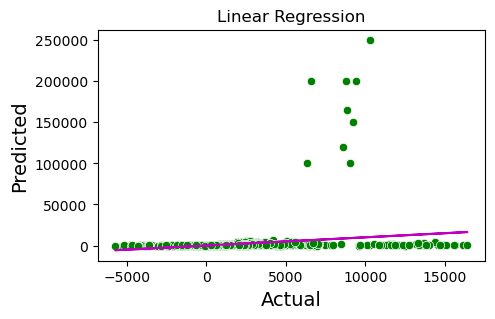

In [248]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_lr,y=y_test,color='g')
plt.plot(pred_lr,pred_lr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=12)
plt.show()

#### Random Forest Regressor

In [249]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_rfr=RFR.predict(x_test)
accuracy_rfr=r2_score(y_test,pred_rfr)
print('R 2 Score',accuracy_rfr*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R 2 Score 32.401897642097644
Mean Absolute Error 727.0777432570725
Mean Squared Error 62538338.70428693
Root Mean Squared Error 7908.118531249195


#### Lasso regression

In [250]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: 3.5041521307872525
Mean Absolute Error: 1771.3925483137239
Mean Squared Error: 89273068.4309913
Root Mean Squared Error: 9448.442645801017


#### Ridge Regressor

In [251]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
accuracy_rg=r2_score(y_test,pred_rg)
print('R2 Score:',accuracy_rg*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

R2 Score: 3.5028966611172163
Mean Absolute Error: 1772.010661093251
Mean Squared Error: 89274229.92790791
Root Mean Squared Error: 9448.504110593798


#### K-Neighbors Regressor

In [252]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 1.7559556662498088
Mean Absolute Error: 676.6519190509421
Mean Squared Error: 90890411.2084857
Root Mean Squared Error: 9533.646270367162


#### ExtraTreesRegressor

In [253]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
accuracy_etr=r2_score(y_test,pred_etr)
print('R2 Score:',accuracy_etr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score: -48.12877318740234
Mean Absolute Error: 837.3681258099889
Mean Squared Error: 137041234.3884579
Root Mean Squared Error: 11706.461223976181


#### DecisionTreeRegressor

In [254]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
accuracy_dtr=r2_score(y_test,pred_dtr)
print('R2 Score:',accuracy_dtr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score: -260.19109788303274
Mean Absolute Error: 995.4388395972486
Mean Squared Error: 333230550.7396357
Root Mean Squared Error: 18254.60354923206


#### Support Vector Regressor

In [255]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
accuracy_svr=r2_score(y_test,pred_svr)
print('R2 Score:',accuracy_svr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: -0.17585350366489116
Mean Absolute Error: 756.3243966016427
Mean Squared Error: 92677623.15624905
Root Mean Squared Error: 9626.921790284216


#### GradientBoostingRegressor

In [256]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
accuracy_gbr=r2_score(y_test,pred_GBR)
print('R2 Score:',accuracy_gbr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: -87.86190254861903
Mean Absolute Error: 999.4080685941419
Mean Squared Error: 173800312.15985534
Root Mean Squared Error: 13183.334637331154


### Cross Validation Score

In [257]:
from sklearn.model_selection import cross_val_score

In [268]:
# Calculate cross-validation scores using RMSE
scores = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, pred_lr))
print("Test RMSE score:", rmse_test)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test - rmse_scores.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [ 3312.68247955  1690.1548296    935.05212916   962.97724943
 35965.2854487 ]
Mean RMSE score: 8573.230427286635
Test RMSE score: 9448.51612085272
Difference between test RMSE and mean cross-validation RMSE is: 875.2856935660857


#### Random Forest Regressor

In [269]:
# Calculate cross-validation scores using RMSE
scores1 = cross_val_score(RFR, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-scores1)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores1)
print("Mean RMSE score:", rmse_scores1.mean())

# Calculate RMSE on the test set
rmse_test1 = np.sqrt(mean_squared_error(y_test, pred_rfr))
print("Test RMSE score:", rmse_test1)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test1 - rmse_scores1.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [27432.54761042  3258.76647449  2222.50765045  3489.48627027
 35994.20713749]
Mean RMSE score: 14479.503028622898
Test RMSE score: 7908.118531249195
Difference between test RMSE and mean cross-validation RMSE is: -6571.384497373702


### Lasso

In [270]:
# Calculate cross-validation scores using RMSE
scores2 = cross_val_score(ls, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-scores2)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores2)
print("Mean RMSE score:", rmse_scores2.mean())

# Calculate RMSE on the test set
rmse_test2 = np.sqrt(mean_squared_error(y_test, pred_ls))
print("Test RMSE score:", rmse_test2)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test2 - rmse_scores2.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [ 3309.95194263  1689.29567005   934.48717942   962.49278603
 35965.26920053]
Mean RMSE score: 8572.299355731942
Test RMSE score: 9448.442645801017
Difference between test RMSE and mean cross-validation RMSE is: 876.1432900690743


#### Ridge Regressor

In [261]:
# Calculate cross-validation scores using RMSE
scores3 = cross_val_score(rg, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-scores3)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores3)
print("Mean RMSE score:", rmse_scores3.mean())

# Calculate RMSE on the test set
rmse_test3 = np.sqrt(mean_squared_error(y_test, pred_rg))
print("Test RMSE score:", rmse_test3)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test3 - rmse_scores3.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [ 3312.48120465  1690.05109421   934.97906595   962.91095154
 35965.29657286]
Mean RMSE score: 8573.143777842623
Test RMSE score: 9448.504110593798
Difference between test RMSE and mean cross-validation RMSE is: 875.3603327511755


#### K-Neighbors Regressor

In [262]:
# Calculate cross-validation scores using RMSE
scores4 = cross_val_score(knn, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-scores4)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores4)
print("Mean RMSE score:", rmse_scores4.mean())

# Calculate RMSE on the test set
rmse_test4 = np.sqrt(mean_squared_error(y_test, pred_knn))
print("Test RMSE score:", rmse_test4)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test4 - rmse_scores4.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [ 9612.18049207   304.23560638   273.03875509   366.19126836
 36003.73622279]
Mean RMSE score: 9311.876468938703
Test RMSE score: 9533.646270367162
Difference between test RMSE and mean cross-validation RMSE is: 221.7698014284597


#### ExtraTreesRegressor

In [263]:
# Calculate cross-validation scores using RMSE
scores5 = cross_val_score(etr, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores5 = np.sqrt(-scores5)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores5)
print("Mean RMSE score:", rmse_scores5.mean())

# Calculate RMSE on the test set
rmse_test5 = np.sqrt(mean_squared_error(y_test, pred_etr))
print("Test RMSE score:", rmse_test5)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test5 - rmse_scores5.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [13825.90951235   850.13470544   277.67332304   637.32348792
 36008.5895962 ]
Mean RMSE score: 10319.926124991649
Test RMSE score: 11706.461223976181
Difference between test RMSE and mean cross-validation RMSE is: 1386.535098984532


#### DecisionTreesRegressor

In [264]:
# Calculate cross-validation scores using RMSE
scores6 = cross_val_score(dtr, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores6 = np.sqrt(-scores6)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores6)
print("Mean RMSE score:", rmse_scores6.mean())

# Calculate RMSE on the test set
rmse_test6 = np.sqrt(mean_squared_error(y_test, pred_dtr))
print("Test RMSE score:", rmse_test6)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test6 - rmse_scores6.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [20607.03346974  4552.84788247  4569.20589576  6855.21655701
 36055.94991639]
Mean RMSE score: 14528.050744271397
Test RMSE score: 18254.60354923206
Difference between test RMSE and mean cross-validation RMSE is: 3726.552804960662


#### Gradient Boosting Regressor

In [265]:
# Calculate cross-validation scores using RMSE
scores7 = cross_val_score(GBR, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores7 = np.sqrt(-scores7)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores7)
print("Mean RMSE score:", rmse_scores7.mean())

# Calculate RMSE on the test set
rmse_test7 = np.sqrt(mean_squared_error(y_test, pred_GBR))
print("Test RMSE score:", rmse_test7)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test7 - rmse_scores7.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [22153.7595359   6205.30864781  2033.66472452  4899.14248991
 35983.17949707]
Mean RMSE score: 14255.010979042276
Test RMSE score: 13183.334637331154
Difference between test RMSE and mean cross-validation RMSE is: -1071.6763417111215


#### SVR

In [266]:
# Calculate cross-validation scores using RMSE
scores8 = cross_val_score(svr, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores8 = np.sqrt(-scores8)  # Convert negative MSE to RMSE

print("RMSE scores for each fold:", rmse_scores8)
print("Mean RMSE score:", rmse_scores8.mean())

# Calculate RMSE on the test set
rmse_test8 = np.sqrt(mean_squared_error(y_test, pred_svr))
print("Test RMSE score:", rmse_test8)

# Difference between test RMSE and mean cross-validation RMSE
difference = (rmse_test8 - rmse_scores8.mean())
print('Difference between test RMSE and mean cross-validation RMSE is:', difference)

RMSE scores for each fold: [  513.74548645   480.31653109   459.40857807   660.50763043
 36049.23977847]
Mean RMSE score: 7632.643600901252
Test RMSE score: 9626.921790284216
Difference between test RMSE and mean cross-validation RMSE is: 1994.2781893829633


##### Based on these observations
- K-Neighbors Regressor is our best  fitting and best performing model the difference is less in RMSE 

### Hyper Parameter Tuning

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2, 3]
}

In [273]:
GSCV=GridSearchCV(knn,param_grid,cv=5)

In [274]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [20, 30, 40], 'n_neighbors': [3, 5, 7],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [275]:
GSCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

In [287]:
best_model=KNN(algorithm='auto',leaf_size=20,n_neighbors=7,p=1,weights='uniform')
best_model.fit(x_train,y_train)
pred_KNN=best_model.predict(x_test)
acc=r2_score(y_test,pred_KNN)
print(acc*100)

51.964011807359945


#### By adding parameter my model give 51.96 % accuracy

Text(0.5, 1.0, 'KNeighborsRegressor')

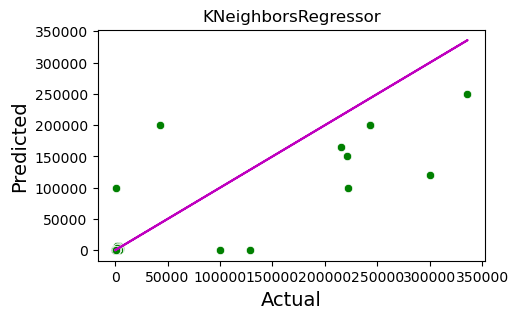

In [288]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_KNN,y=y_test,color='g')
plt.plot(pred_KNN,pred_KNN,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=12)

### Saving the Model

In [289]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Zomato Restaurant Project.pkl")

['Zomato Restaurant Project.pkl']

In [291]:
#Now loading file and checcking prediction 
model=joblib.load("Zomato Restaurant Project.pkl")

In [292]:
prediction=model.predict(x_test)
prediction

array([200.        , 364.28571429, 550.        , ..., 292.85714286,
       300.        , 871.42857143])

In [293]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,300,200.000000
1,300,364.285714
2,600,550.000000
3,500,635.714286
4,1000,600.000000


Text(0, 0.5, 'Predication')

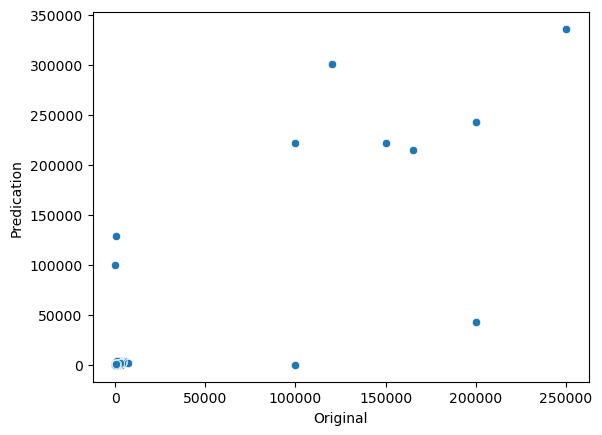

In [294]:
sns.scatterplot(x=Original,y=prediction)
plt.xlabel('Original')
plt.ylabel('Predication')

### Now we will go with the target variable 'Price range'

### Checking Skewness

In [352]:
df.skew()

City                    -1.193777
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

### Checking correlation between target variable and independent variables

In [353]:
corr_matrix=df.corr()
corr_matrix

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
City,1.000000,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Longitude,0.117391,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,-0.004301,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,0.026614,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719,-0.127955
Average Cost for two,-0.028838,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,-0.071996,0.337334,-0.101864,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296
Has Table booking,-0.003762,0.100488,0.054658,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422,-0.062076
Has Online delivery,0.012723,0.178757,0.118722,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.074303,-0.140464
Is delivering now,-0.014039,0.018787,0.015001,0.007773,-0.001862,0.001458,-0.016816,0.101730,1.000000,0.010940,0.019180,0.001886,-0.031970,-0.001124,-0.016607
Price range,-0.105759,-0.078939,-0.166688,-0.005350,0.075083,0.075179,0.501925,0.077918,0.010940,1.000000,0.437944,-0.140468,0.164242,0.309444,0.178035


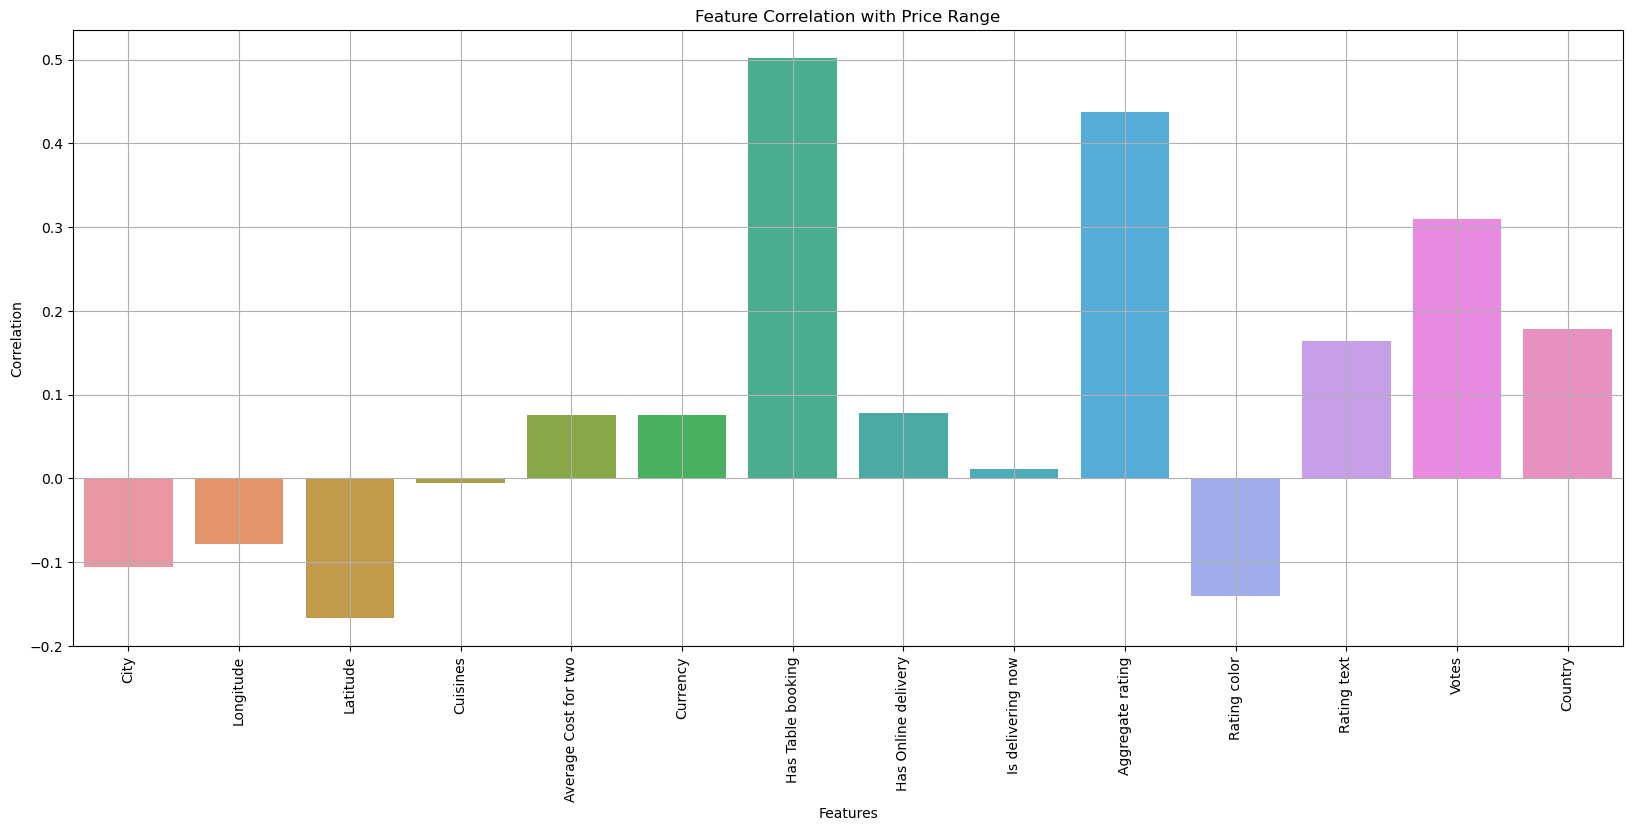

In [354]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['Price range'].drop('Price range').index, y=corr_matrix['Price range'].drop('Price range').values)
plt.title("Feature Correlation with Price Range")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**From above graph we can observe that**
1. **Latitude** has a negative correlation with price range, indicating that restaurants at higher latitudes tend to have lower price ranges.
2. **City** and **Longitude** also have a slight negative correlation with price range, suggesting that certain cities and longitudes might be associated with lower price ranges.
3. **Has Table Booking** shows the highest positive correlation with price range, indicating that restaurants offering table bookings tend to have higher price ranges.
4. **Aggregate Rating** also has a strong positive correlation with price range, suggesting that higher-rated restaurants tend to have higher price ranges.
5. **Votes** and **Country** have a moderate positive correlation with price range, implying that more votes and certain countries are associated with higher price ranges.
6. **Currency** and **Average Cost for Two** show a slight positive correlation with price range, indicating that these factors are somewhat associated with higher price ranges.
7. **Rating Color** has a negative correlation with price range, meaning that certain rating colors might be linked to lower price ranges.
8. **Cuisines**, **Has Online Delivery**, and **Is Delivering Now** show little to no correlation with price range, suggesting that these features do not significantly impact the price range.

### Splitting the data into training and test

In [355]:
#seperating independent variable and target into x and y
x=df.drop('Price range',axis=1)
y=df['Price range']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (9551, 14)
Dimension of Target (9551,)


### Feature Scaling using Standard Scalarization

In [356]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,-0.228533,1.372269,-1.025581,-0.135100,-0.006154,-4.351046,2.692181,-0.587547,-0.059771,1.407131,-1.977859,-0.465442,0.365202,0.853457
1,-0.228533,1.371945,-1.026647,0.236387,0.000049,-4.351046,2.692181,-0.587547,-0.059771,1.209281,-1.977859,-0.465442,1.009168,0.853457
2,-0.142317,1.372975,-1.024131,1.325565,0.173743,-4.351046,2.692181,-0.587547,-0.059771,1.143331,-1.308053,1.895070,0.262911,0.853457
3,-0.142317,1.372966,-1.023775,0.265562,0.018659,-4.351046,-0.371446,-0.587547,-0.059771,1.473081,-1.977859,-0.465442,0.483766,0.853457
4,-0.142317,1.372991,-1.023854,0.257782,0.018659,-4.351046,2.692181,-0.587547,-0.059771,1.407131,-1.977859,-0.465442,0.167595,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,2.659685,-0.847685,1.378025,1.601750,-0.069428,7.681415,-0.371446,-0.587547,-0.059771,0.945480,-1.308053,1.895070,1.467151,2.738952
9547,2.659685,-0.846144,1.376849,1.623144,-0.067878,7.681415,-0.371446,-0.587547,-0.059771,1.011430,-1.308053,1.895070,2.039049,2.738952
9548,2.659685,-0.846305,1.381025,0.234442,-0.063845,7.681415,-0.371446,-0.587547,-0.059771,0.681680,1.371170,0.124686,1.171903,2.738952
9549,2.659685,-0.846272,1.381221,1.298336,-0.066947,7.681415,-0.371446,-0.587547,-0.059771,0.879530,-1.308053,1.895070,1.729853,2.738952


### Checking Variance Inflation Factor(VIF)

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = {'Features': x.columns,
            'VIF Values': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]}

vif = pd.DataFrame(vif_data)

# Display the VIF dataframe
print(vif)

                Features  VIF Values
0                   City    1.064901
1              Longitude    3.443293
2               Latitude    1.315465
3               Cuisines    1.038536
4   Average Cost for two    1.029127
5               Currency    1.292581
6      Has Table booking    1.096622
7    Has Online delivery    1.158914
8      Is delivering now    1.012200
9       Aggregate rating    1.605782
10          Rating color    1.227101
11           Rating text    1.310232
12                 Votes    1.233245
13               Country    3.583046


In [358]:
x.drop('Country',axis=1,inplace=True)

In [359]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.061502,City
1,1.323052,Longitude
2,1.062657,Latitude
3,1.035653,Cuisines
4,1.024990,Average Cost for two
5,1.180181,Currency
6,1.092332,Has Table booking
7,1.145492,Has Online delivery
8,1.012200,Is delivering now
9,1.496834,Aggregate rating


### Performing PCA(Principal Component Analysis (PCA))

In [360]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum R2_Score is=> 0.3728975208572709 On Random State=> 116


In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=best_state)

#### Linear Regression

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
accuracy_LR=r2_score(y_test,LR_pred)
print('R2 Score:-',accuracy_LR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2 Score:- 37.28975208572709
Mean Absolute Error:- 0.5770554811155729
Mean Squared Error:- 0.507649810754472
Root Mean Squared Error: 0.712495481216879


### Random Forest Regressor

In [365]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
accuracy_RFR=r2_score(y_test,RFR_pred)
print('R2 Score',accuracy_RFR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,RFR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2 Score 58.88796354762199
Mean Absolute Error:- 0.4044242847173762
Mean Squared Error:- 0.33280872295882763
Root Mean Squared Error: 0.5768957643793441


#### ExtraTrees Regressor

In [366]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
accuracy_ETR=r2_score(y_test,ETR_pred)
print('R2 Score',accuracy_ETR*100)
print('Mean absolute Error',mean_absolute_error(y_test,ETR_pred))
print('Mean Squared Error',mean_squared_error(y_test,ETR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,ETR_pred)))

R2 Score 59.75353926777316
Mean absolute Error 0.39332170272156314
Mean Squared Error 0.3258017445917656
Root Mean Squared Error: 0.5707904559396255


#### Lasso Regressor

In [367]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(x_train,y_train)
pred_ls=LS.predict(x_test)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: -0.15765633724424966
Mean Absolute Error: 0.7513762310658947
Mean Squared Error: 0.8107927647602412
Root Mean Squared Error: 0.9004403171561352


#### Redge Regressor

In [368]:
from sklearn.linear_model import Ridge
RG=Ridge()
RG.fit(x_train,y_train)
RG_pred=RG.predict(x_test)
accuracy_RG=r2_score(y_test,RG_pred)
print('R2 Score',accuracy_RG*100)
print('Mean Absolute Error',mean_absolute_error(y_test,RG_pred))
print('Mean Squared Error',mean_squared_error(y_test,RG_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RG_pred)))

R2 Score 37.28920057306533
Mean Absolute Error 0.5770641154927056
Mean Squared Error 0.5076542753405274
Root Mean Squared Error: 0.7124986142727068


#### K-Neighbors Regressor

In [369]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 57.635839865442136
Mean Absolute Error: 0.40460572226099095
Mean Squared Error: 0.34294487090020936
Root Mean Squared Error: 0.5856149510559044


#### SVR

In [370]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_svr)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: 47.55885558601811
Mean Absolute Error: 0.44998812982913605
Mean Squared Error: 0.4245197224207865
Root Mean Squared Error: 0.6515517803066664


#### GradientBoostingRegressor

In [371]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_GBR)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 52.775937118004194
Mean Absolute Error: 0.4856282097564528
Mean Squared Error: 0.3822865860437162
Root Mean Squared Error: 0.6182932848120835


### Cross Validation

In [373]:
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [378]:
score1=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,LR_pred)-score1.mean())*100)

[-0.20356442  0.30783075  0.33301483  0.37910392  0.32379509]
0.228036033535588
Difference between R2 score and cross validation score is: 14.486148732168292


#### Random Forest Regressor

In [379]:
score2=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RFR_pred)-score2.mean())*100)

[0.21546694 0.53110197 0.56988719 0.63442841 0.47206469]
0.48458984217781487
Difference between R2 score and cross validation score is: 10.428979329840505


#### ExtraTrees Regressor

In [380]:
score3=cross_val_score(ETR,x,y)
print(score3)
print(score3.mean())
print('Difference Between R2 score and cross validation score is:',(r2_score(y_test,ETR_pred)-score3.mean())*100)

[0.22935687 0.52879648 0.59037731 0.64315703 0.51174649]
0.5006868371235829
Difference Between R2 score and cross validation score is: 9.684855555414874


#### Lasso Regressor

In [381]:
score4=cross_val_score(LS,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation sccore is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[-0.14892574 -0.01157098 -0.1494956  -0.07008624 -0.00469434]
-0.07695458130770794
Difference between R2 score and cross validation sccore is: 7.537801793526544


#### Redge Regressor

In [382]:
score5=cross_val_score(RG,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RG_pred)-score5.mean())*100)

[-0.2034048   0.30784558  0.33300185  0.3790871   0.32377724]
0.22806139389783048
Difference between R2 score and cross validation score is: 14.483061183282281


#### K-Neighbors Regressor

In [383]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score6.mean())*100)

[0.14240213 0.46219144 0.56255606 0.61480139 0.3951504 ]
0.4354202845953211
Difference between R2 score and cross validation score is: 14.093811405910028


#### SVR

In [384]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.15197507 0.3944258  0.43240365 0.4966773  0.41782243]
0.37866084956308166
Difference between R2 score and cross validation score is: 9.692770629709946


#### GradientBoostingRegressor

In [385]:
score8=cross_val_score(GBR,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score8.mean())*100)

[0.19406955 0.45385957 0.49506329 0.5487753  0.42940604]
0.42423475076397443
Difference between R2 score and cross validation score is: 10.352462041606747


- The ExtraTreesRegressor seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- ExtraTreesRegressor is our best fitting and best performing model

### Hyper Parameter Tuning

In [386]:
from sklearn.model_selection import GridSearchCV

In [390]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [391]:
GSCV=GridSearchCV(ETR,param_grid,cv=5)

In [392]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [393]:
GSCV.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [394]:
best_model=ExtraTreesRegressor(max_depth=30,max_features='auto',min_samples_leaf=1,min_samples_split=10,n_estimators=100)
best_model.fit(x_train,y_train)
pred_=best_model.predict(x_test)
acc=r2_score(y_test,pred_)
print(acc*100)

61.52378110018522


#### By adding parameter my model give 61.52 % accuracy

### Saving Model

In [397]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Zomato Restaurant price range prediction Project.pkl")

['Zomato Restaurant price range prediction Project.pkl']

In [398]:
#Now loading file and checcking prediction 
model=joblib.load("Zomato Restaurant price range prediction Project.pkl")

In [399]:
prediction=model.predict(x_test)
prediction

array([2.07103175, 1.66667857, 3.7500754 , ..., 1.93063095, 1.24808386,
       1.81706746])

In [400]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,3,2.071032
1,1,1.666679
2,4,3.750075
3,1,1.505429
4,1,1.026172


Text(0, 0.5, 'Predication')

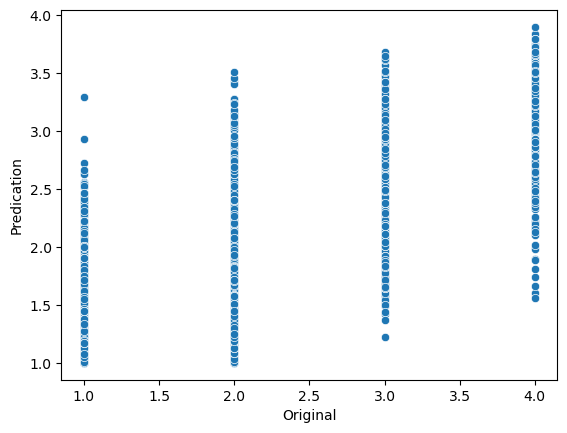

In [401]:
sns.scatterplot(x=Original,y=prediction)
plt.xlabel('Original')
plt.ylabel('Predication')